In [1]:
import os
import sys
import trace
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import norm
from scipy.optimize import curve_fit
from matplotlib import cm, ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from typing import List, Dict, Tuple

import math
from scipy import integrate, interpolate, special
from scipy.special import erf

import emcee

root_dir = os.environ.get("ROOT_PATH")
if not root_dir in sys.path: sys.path.append(root_dir)

from src.utils.constants import *
from src.utils.CosmoFunc import rz_table

from src.filepaths import *
# from src.step_7_fit_fp import *

pvhub_dir = os.environ.get('PVHUB_DIR_PATH')
if not pvhub_dir in sys.path: sys.path.append(pvhub_dir)
from pvhub import * # type: ignore

import getdist
from getdist import plots, MCSamples

# Get environment variables from .env file
ROOT_PATH = os.environ.get('ROOT_PATH')
SMIN_SETTING = int(os.environ.get('SMIN_SETTING'))
COMPLETENESS_SETTING = int(os.environ.get('COMPLETENESS_SETTING'))
FP_FIT_METHOD = int(os.environ.get('FP_FIT_METHOD'))

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


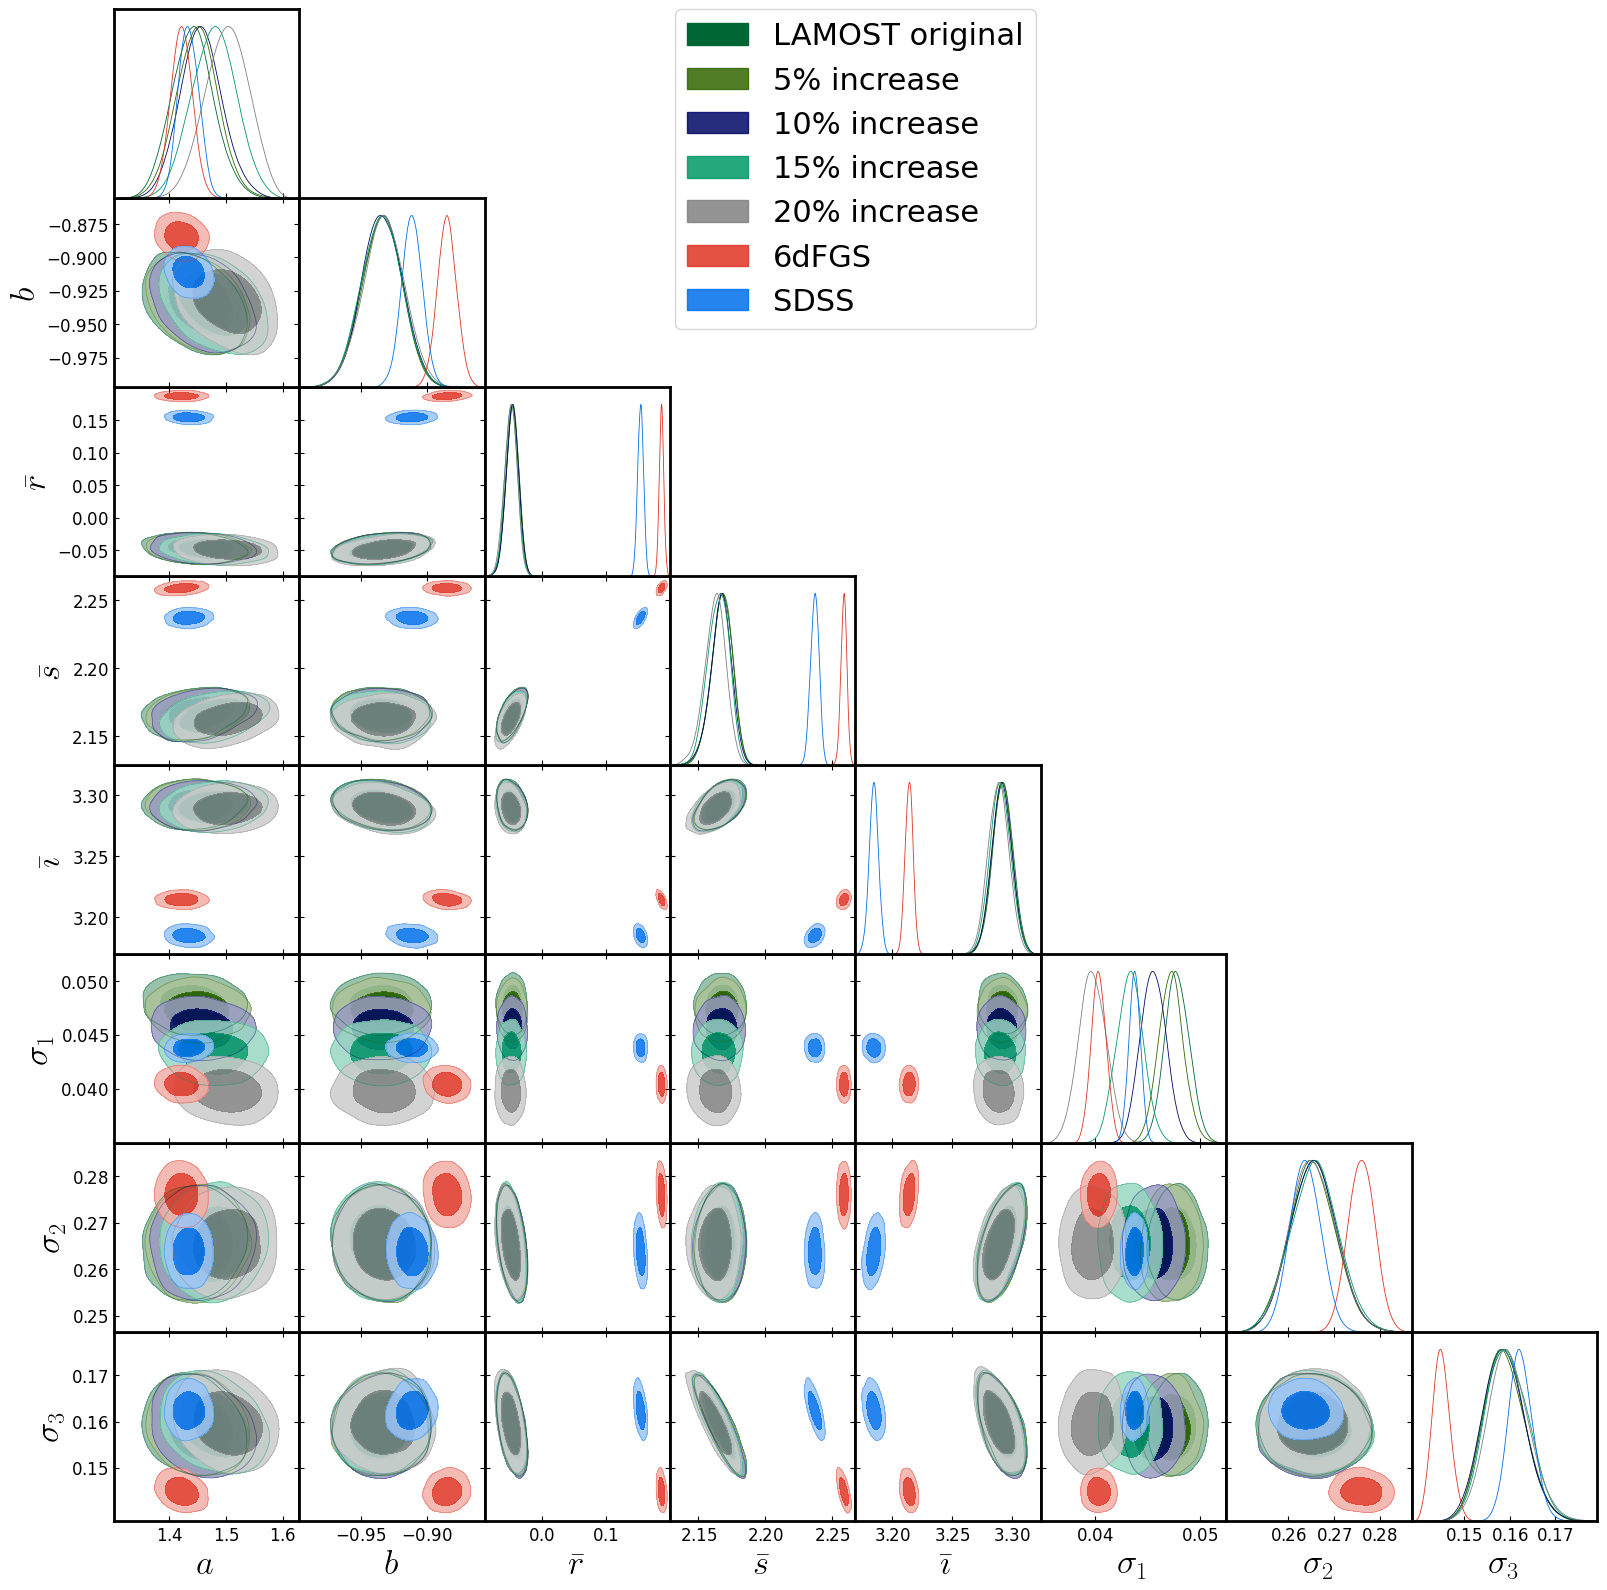

In [6]:
SMIN_SETTING = 1
FP_FIT_METHOD = 0

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['font.family'] = 'sans-serif'

# Load 6dFGS and SDSS chains
samples_6df = np.load("../../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/6dfgs_chain.npy")
samples_sdss = np.load("../../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/sdss_chain.npy")

# Load LAMOST chains: original data and errors increased by N percent
samples_lamost = np.load("../../artifacts/fp_fit/smin_setting_1/fp_fit_method_0/lamost_chain.npy")
samples_5pct = np.load("lamost_error_increased_by_5_percent.npy")
samples_10pct = np.load("lamost_error_increased_by_10_percent.npy")
samples_15pct = np.load("lamost_error_increased_by_15_percent.npy")
samples_20pct = np.load("lamost_error_increased_by_20_percent.npy")

# parameter names
names = [r'$a$', r'$b$', r'$\bar{r}$', r'$\bar{s}$', r'$\bar{\imath}$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']

samples1 = getdist.MCSamples(samples=samples_lamost, names=names, label='LAMOST original')
samples2 = getdist.MCSamples(samples=samples_5pct, names=names, label='5% increase')
samples3 = getdist.MCSamples(samples=samples_10pct, names=names, label='10% increase')
samples4 = getdist.MCSamples(samples=samples_15pct, names=names, label='15% increase')
samples5 = getdist.MCSamples(samples=samples_20pct, names=names, label='20% increase')
samples6 = getdist.MCSamples(samples=samples_6df, names=names, label='6dFGS')
samples7 = getdist.MCSamples(samples=samples_sdss, names=names, label='SDSS')

# Triangle plot
g = getdist.plots.get_subplot_plotter()
g.settings.legend_fontsize = 25
g.settings.axes_fontsize = 15
g.settings.axes_labelsize = 20

g.triangle_plot([samples1, samples2, samples3, samples4, samples5, samples6, samples7], filled=True)

ndim = 8
for i in range(ndim):    
    for j in range(ndim):
        if j<=i:
            ax = g.subplots[i,j]
            # ax.axvline(prev_vals_6df[j], color='grey', ls='--', alpha=0.5)
            # ax.axvline(prev_vals_sdss[j], color='red', ls='--', alpha=0.5)
            # ax.axvline(prev_vals_lamost[j], color='green', ls='--', alpha=0.5)
            ax.set_xlabel(ax.get_xlabel(), usetex=True, fontsize=25, family='sans-serif')
            ax.set_ylabel(ax.get_ylabel(), usetex=True, fontsize=25, family='sans-serif')

            if i != j:
                pass
                # ax.axhline(prev_vals_6df[i], color='grey', ls='--', alpha=0.5)
                # ax.axhline(prev_vals_sdss[i], color='red', ls='--', alpha=0.5)
                # ax.axhline(prev_vals_lamost[i], color='green', ls='--', alpha=0.5)

g.export('increase_lamost_error.png', dpi=300)